In [1]:
                             import os
                             import numpy             as np
                             import pandas            as pd
                             import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline        import Pipeline
from sklearn.impute          import SimpleImputer
from sklearn.preprocessing   import StandardScaler, OneHotEncoder
from sklearn.compose         import ColumnTransformer
from sklearn.linear_model    import LinearRegression
from sklearn.linear_model    import LinearRegression
from sklearn.metrics         import mean_squared_error, mean_absolute_error
from sklearn.tree            import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble        import RandomForestRegressor
                             import joblib

# Prédiction **des prix du logement en Californie*

In [2]:
df = pd.read_csv('california_housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.tail()                  # Les 5 dernières

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [5]:
df.shape                    # La forme du dataframe

(20640, 10)

In [6]:
df.isnull().sum()           # Les valeurs manquantes

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
df.info()                    # Les types de données

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
df.describe()                # Affiche `count`, `mean`, `std`, `min`, `max`, `perrcentiles`

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
df['ocean_proximity'].unique()  # différentes valeurs

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [10]:
df['ocean_proximity'].value_counts()         # nombres d'occurences par valeur

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

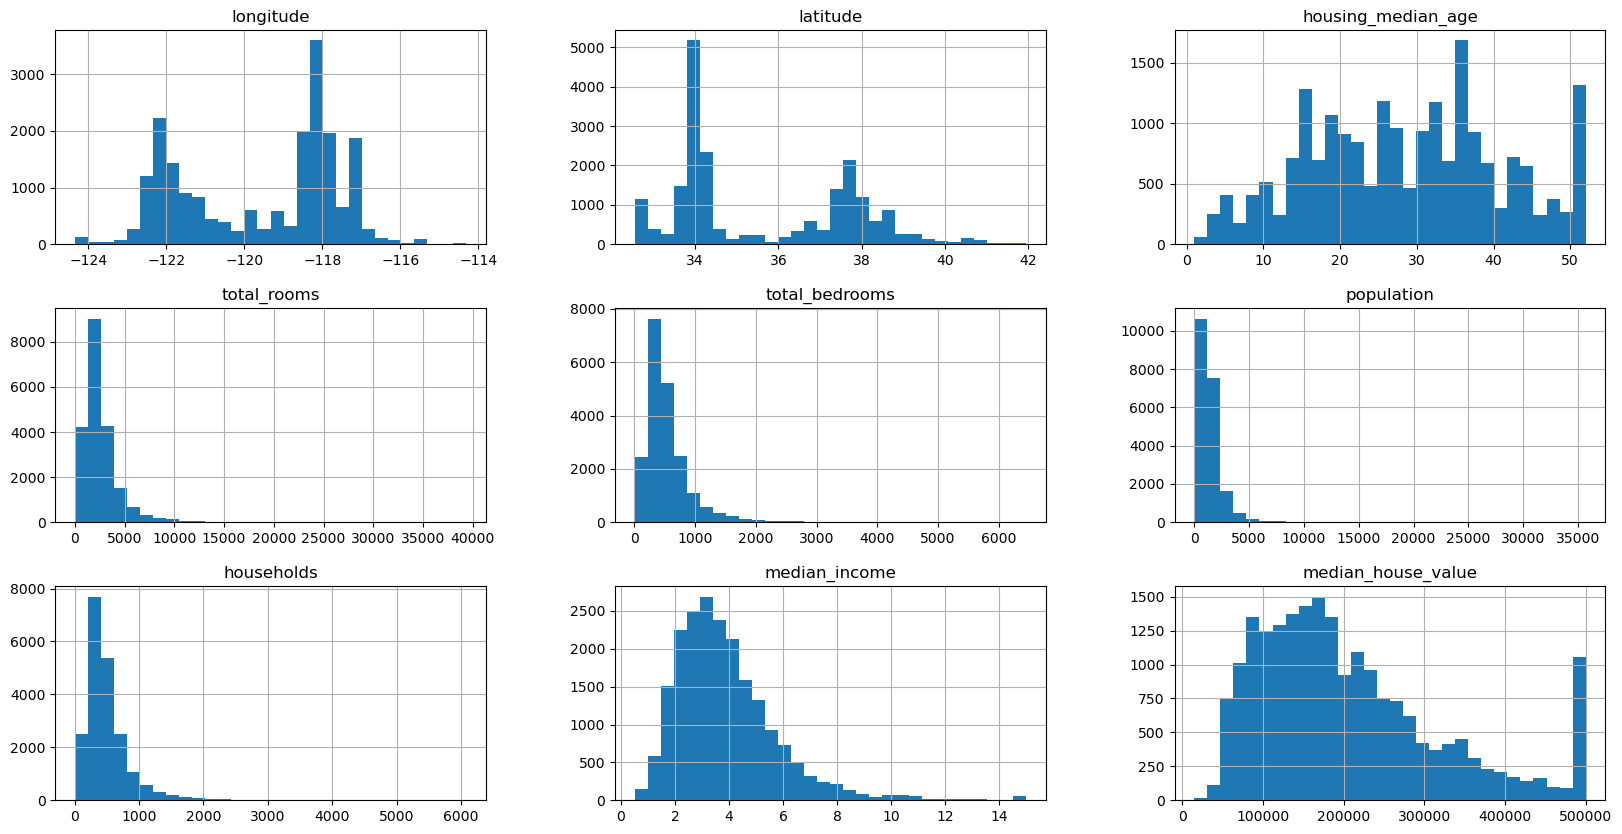

In [11]:
df.hist(bins=30, figsize=(20, 10))          # dispersion des valeurs

### Diviser le dataframe

In [12]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=8)
train_set.shape, test_set.shape

((16512, 10), (4128, 10))

In [13]:
df['median_income'].min(), df['median_income'].max()

(0.4999, 15.0001)

In [14]:
df['income_cat'] = pd.cut(df['median_income'], bins=[0., 1.5, 3.0, 4.5, 6.0, np.inf], labels=[1, 2, 3, 4, 5])

In [15]:
# diviser le DataFrame df en un jeu d'entraînement et un jeu de test (80% / 20%) tout en conservant la même répartition proportionnelle des catégories présentes dans la colonne income_cat dans les deux sous-ensembles
strat_train_set, strat_test_set = train_test_split(df, test_size=0.2, stratify=df['income_cat'], random_state=8)

In [16]:
strat_train_set['income_cat'].value_counts()

income_cat
3    5789
2    5265
4    2911
5    1890
1     657
Name: count, dtype: int64

In [17]:
strat_test_set['income_cat'].value_counts()

income_cat
3    1447
2    1316
4     728
5     472
1     165
Name: count, dtype: int64

Ce que cela signifie
* La stratification sur `income_cat` a permis de conserver des proportions similaires de chaque catégorie dans le jeu d'entraînement `(strat_train_set)` et dans le jeu de test `(strat_test_set)`.
* E. g. la catégorie 3 représente 5789 occurrences dans l'entraînement et 1447 dans le test, soit environ 20 % dans le test par rapport à l'entraînement, conforme au paramètre `test_size=0.2`.
* La répartition homogène évite les biais statistiquement importants qui pourraient survenir avec un découpage purement aléatoire. Cela garantit une bonne représentativité des différentes populations dans les deux sous-jeux.
* Cette homogénéité est primordiale pour entraîner un modèle fiable et pour évaluer ses performances de manière réaliste, surtout en présence de classes moins fréquentes (ici la classe 1 est la moins représentée, mais bien présente dans train et test).

L'importance :
* Si la distribution avait été différente entre train/test, les performances sur le test ne seraient pas représentatives lors du déploiement.
* La stratification préserve ainsi la validité statistique des estimations issues du test.

La fonction `train_test_split` avec `stratify` a correctement réparti les classes `income_cat` en proportions proches dans les jeux train et test, garantissant l’équilibre nécessaire pour un apprentissage et une validation robustes.

In [18]:
# suppression de la colonne `income_cat`
strat_train_set.drop(columns='income_cat', inplace=True)
strat_test_set.drop(columns='income_cat', inplace=True)

<Axes: xlabel='longitude', ylabel='latitude'>

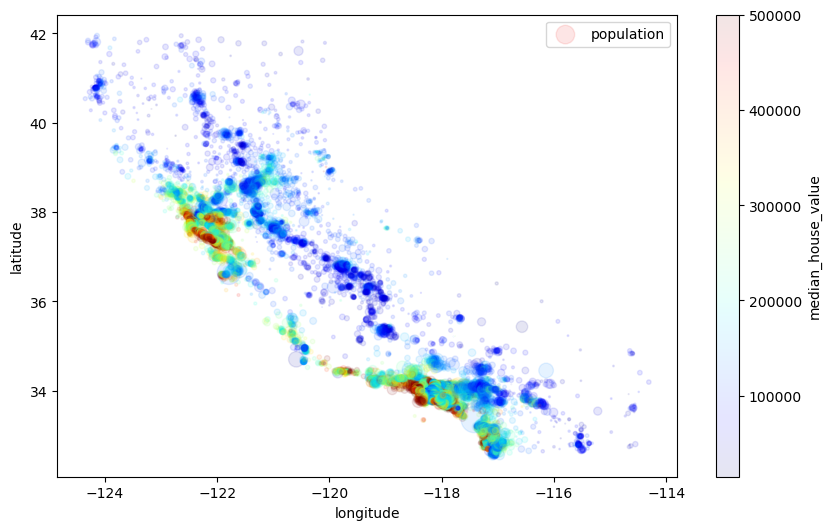

In [19]:
df.plot(kind='scatter', x='longitude', y='latitude', figsize=(10, 6), 
             s=df['population']/100, label='population', alpha=0.1, 
             cmap='jet', c='median_house_value', colorbar='True')

## **Préparer les donnes pour les algos de ML**

### Diviser l'ensemble de données en features et label

In [20]:
housing = strat_train_set.drop(columns='median_house_value')
housing_label = strat_train_set['median_house_value'].copy()

In [21]:
housing_num = housing.drop(columns='ocean_proximity')   # Suppresssion ; il s'agit d'un pipelin de données numériques

`SimpleImputer(strategy='median')` : remplace les valeurs manquantes de chaque colonne par la médiane correspondante. Cette stratégie est robuste aux valeurs extrêmes.

`StandardScaler()` : standardise les variables numériques en soustrayant la moyenne et en divisant par l'écart-type, ce qui donne des données centrées réduites avec moyenne 0 et écart-type 1. Cela facilite la convergence de nombreux algorithmes d'apprentissage.

Pipeline : chaîne les transformations pour pouvoir appliquer facilement la suite au DataFrame, offrant une organisation propre et reproductible.

`fit_transform(housing_num)` : calcule les statistiques nécessaires (médianes, moyennes, écarts-types) durant l'ajustement et transforme les données en une matrice NumPy normalisée.

In [22]:
num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('standarize', StandardScaler())
])
housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[ 0.70903084, -0.73611778, -0.05246406, ...,  0.98070311,
         1.00253757, -0.19279129],
       [ 1.12365056, -0.68468381, -1.80430733, ...,  1.3601267 ,
         1.76722451, -0.12359366],
       [ 1.20357726, -0.97926016, -1.96356581, ...,  1.33251607,
         1.18574381, -0.06156895],
       ...,
       [ 0.60912247, -0.79690337, -0.21172254, ...,  0.87115123,
         0.77153839, -0.45386467],
       [-0.84953969,  1.16693897,  1.85863769, ..., -0.87188158,
        -0.7206632 , -0.88218324],
       [ 0.59413622, -0.74546941,  0.50494062, ...,  0.3367518 ,
         0.12367862, -0.8303905 ]], shape=(16512, 8))

In [23]:
# définir les listes des noms des colonnes numériques et catégoriques à traiter séparément dans un pipelineabs
num_attributes = list(housing_num)
cat_attributes = ['ocean_proximity']

In [24]:
# transformer deux groupes de colonnes et transformation du `full_pipeline` au df complet, combinant proprement traitement numérique et encodage catégoriel
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attributes),
    ('cat', OneHotEncoder(), cat_attributes)
])

In [25]:
housing_prepared = full_pipeline.fit_transform(housing) # nettoyer et pré-traiter le dataset d’origine via le pipeline

In [26]:
lr = LinearRegression()                                       # Créer un  modèle de régression linéaire
lr.fit(housing_prepared, housing_label)                       # Ajuster les coefficients de la régression linéaire pour minimiser l'erreur quadratique entre les prédictions et la variable cible à partir des données prétraitées
some_data = housing.iloc[:5]                                  # Récupèrer les 5 premiers exemples à prédire
some_label = housing_label.iloc[:5]                           # Conserver les étiquettes pour évaluer
some_prepared_data = full_pipeline.transform(some_data)       # Transformer ces données brutes avec le pipeline sans recalculer les paramètres déjà appris
some_prediction = lr.predict(some_prepared_data)              # Prédire les valeurs cibles selon la relation linéaire apprise, pour les 5 exemples préparés

In [27]:
# Calculer l’erreur quadratique moyenne (MSE) entre les valeurs réelles et les valeurs prédites
# Prendre la racine carrée de cette erreur pour obtenir la racine de l’erreur quadratique moyenne (RMSE).
error = mean_squared_error(some_label, some_prediction)
np.sqrt(error)

np.float64(44910.39810668252)

In [28]:
dtr = DecisionTreeRegressor()                               # Créer un modèle de régression par arbre décisionnel
dtr.fit(housing_prepared, housing_label)                    # Entrainer le modèle sur les données prétraitées et leurs étiquettes (valeurs cibles)
dtr_prediction = dtr.predict(some_prepared_data)            # Prédir la valeur cible pour de nouvelles données préparées
dtr_error = mean_squared_error(some_label,dtr_prediction)   # Calculer l’erreur quadratique moyenne entre les vraies valeurs et les prédictions du modèle
np.sqrt(dtr_error)                                          # RMSE, mesurant l’erreur moyenne en unités d’origine.

np.float64(0.0)

In [29]:
scores = cross_val_score(dtr, housing_prepared, housing_label, scoring='neg_mean_squared_error', cv=10)
np.sqrt(-scores)                   # RMSE pour chaque fold

array([71124.45720626, 68408.73083899, 73797.48376947, 69254.25810164,
       68196.95440934, 67685.91158383, 70502.62365774, 65981.43205331,
       71224.74865098, 68052.5663074 ])

In [30]:
rfr = RandomForestRegressor()              # Créer un modèle de forêt aléatoire pour une tâche de régression, composé de multiples arbres de décision moyennés pour améliorer stabilité et précision
rfr.fit(housing_prepared, housing_label)   # Entraîner ce modèle sur les données prétraitées et les étiquettes associées
rfr_scores = cross_val_score(rfr, housing_prepared, housing_label, scoring='neg_mean_squared_error', cv=10) # Faire une validation croisée à 10 folds
np.sqrt(-rfr_scores), np.sqrt(-rfr_scores).mean()       # Convertir les scores de validation croisée en RMSE, calculer leur moyenne pour évaluer globalement la performance du modèle Random Forest

(array([50280.92684763, 49116.76187529, 48977.54595404, 51962.23927532,
        46926.22078488, 47579.46153562, 48655.49256199, 49419.67345571,
        50852.19440779, 48535.42790397]),
 np.float64(49230.59446022312))

In [31]:
joblib.dump(rfr, 'rfr_model.pkl')   # Persister le modèle dans un fichier

['rfr_model.pkl']